# Emotional Face Detection using Convolutional Neural Network (CNN)

Arsitektur dari CNN secara dibagi menjadi 2 bagian besar, yakni **Feature Extraction Layer** dan **Fully-Connected Layer (MLP)**.

- Feature Extraction Layer, terdiri dari dua bagian yaitu *Convolutional Layer* dan *Pooling Layer*
- Fully-Connected Layer, memiliki beberapa  bagian *hidden layer*, *activation function*, *output layer* dan *loss function*.

Sumber Code : [Membuat klasifikasi gambar(images), Menggunakan Keras-Tensorflow (tf.keras) di Python](https://medium.com/@hafizhan.aliady/membuat-klasifikasi-gambar-images-menggunakan-keras-tensorflow-tf-keras-dan-python-53f7ae953cea)

## Importing Libraries

Pertama, kita perlu import semua package / library umumnya yang dibutuhkan dalam proses klasifikasi, seperti

[Numpy](https://www.numpy.org/) atau biasa disebut Numerical Python merupakan library Python yang digunakan untuk melakukan komputasi data yang bertipe numerik.
[Pandas](https://pandas.pydata.org/) adalah sebuah library Python yang biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.
[Matplotlib](https://matplotlib.org/) merupakan library Python yang digunakan untuk melakukan visualisasi data menjadi lebih rapi dan menarik.
[Seaborn](https://seaborn.pydata.org/) adalah library Python yang digunakan untuk membuat grafik dan statistik. Library ini di bangun berdasarkan library matplotlib.

Selain itu, kita juga perlu untuk menginstall package / library untuk melakukan proses deep learning, seperti library **Keras** dan **Tensorflow**, kemudian meng-import beberapa sublibary yang dibutuhkan antara lain :

- Sublibrary **Sequential** untuk model neural network berupa sequential network.
- Sublibrary **Convolution2D** digunakan untuk memulai CNN di tahap pertama yaitu proses convolution. Karena kita mengolah data berupa gambar maka kita gunakan library convolution khusus untuk 2 dimensi yaitu Convolution2D. 
- Sublibary **MaxPooling2D** digunakan setelah proses convolution, yaitu dengan mengambil nilai maximumnya (disebut dengan maxpooling). Karena kita mengolah gambar, maka kita gunakan maxpooling untuk 2 dimensi.
- Sublibary **Flatten** digunakan untuk proses flattening yang dilakukan setelah proses maxpooling.
- Sublibary **Dense** untuk menjalankan full connection neural network atau untuk mendefinisikan parameter neural networks kita.
- Sublibrary **ImageDataGenerator** untuk melakukan image augmentation process. Proses ini digunakan untuk mengurangi overfitting. 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Importing Deep Learning Libraries

from keras.models import Model,Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

## Load Dataset

Varibel **picture_size** untuk mengatur ukuran gambar yang akan diproses. Dan varibael **folder_path** untuk membaca letak Image Data dengan path berdasarkan letak direktori file / folder pada perangkat.

Dataset Link : [Face Emotion Dataset](https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset)

In [14]:
# Setup and Load Dataset

picture_size = 48
folder_path = "D:/AUFA/Semester 7/Visi Komputer/Emotion_Detection_CNN/images/"

TypeError: can only concatenate str (not "tuple") to str

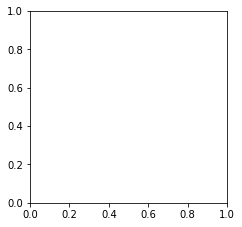

In [15]:
# Read Image Data
expression = 'sad',

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

Fungsi `ImageDataGenerator()` merupakan Image data generator sehingga kita mengenerate data image dari sebuah file / folder yang telah kita buat sebelumnya. Proses ini penting ketika CNN bisa menangkap pola (feature) training set, namun (terkadang) gagal dalam menggeneralisir pola saat validasi (test set). Kasus ini biasanya terjadi pada pembelajaran yang menggunakan data sedikit. Sehingga biasanya direkomendasikan untuk melakukan **Data Augmentation** (diartikan sebagai memperbanyak data).

- `datagen_train` adalah nama Objek digunakan untuk melatih train_set kita (semua gambar di folder train_set)
- `datagen_val` adalah nama Objek digunakan untuk menguji/memvalidasi test_set kita (semua gambar di folder test_set)

Untuk mendefinisikan objek `train_set`, semua parameter dan perintah yang digunakan kita sesuaikan yang ada di dokumentasi Keras. Seperti :

- `target_size`= dimensi dari citra yang akan digunakan dalam proses training, sama dengan `picture_size` yang telah ditentukan sebelumnya yaitu 48x48

- `batch_size`= banyaknya citra yang dimasukan dalam setiap steps training. Batch_size yang Saya pilih 128, artinya untuk 28821 gambar (data) di `train_set` akan dibagi menjadi beberapa batch dengan isinya masing-masing 128 gambar (ada 28821/128 batch).

- `class_mode`= metode pemilihan klasifikasi. 
   - **Binary** = bernilai biner, seperti [1,0,0,0] [0,1,0,0] [0,0,1,0] [0,0,0,1]. 
   - **Categorical** = 1,2,3,4,5. 
   
   Karena output nya dapat melakukan beberapa klasifikasi gambar (data) maka saya memilih `class_mode` categorical.

- `shuffle`= data didalam folder tersebut diacak sehingga tidak sesuai urutan yang ada seperti urutan alfabetik. 


Untuk objek `test_set` hampir sama dengan objek `train_test`, hanya saja direktori foldernya harus sesuaikan dengan letak data **test_set** atau data validation nya. Dan parameter `shuffle` Saya atur dengan nilai **False** yang artinya data didalam folder tersebut tidak diacak sehingga sesuai urutan yang ada seperti urutan alfabetik

In [ ]:
batch_size  = 128

# Data Augment
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Setelah dijalankan maka di bagian console spyder akan mencantumkan tulisan **Found 28821 images belonging to 7 classes** dan **Found 7066 images belonging to 7 classes** yang artinya sudah berhasil mendeteksi direktori pada train_set dan test_set.

# Model Building (Bagian yang dirubah atau Improvisasi)

### FEATURE EXTRACTION LAYER

**Inisalisasi CNN**. Saya mendefinisikan objek bernama `model` yang merupakan objek untuk melakukan proses klasifikasi dengan menggunakan fungsi Sequential untuk memulai inisialisasi.

Tahapan proses feature extraction (*feature learning*) CNN pada umumnya
- **Convolution**.  Menggunakan method add kemudian dalam tanda kurung diikuti dengan `Convolution2D` dan parameter apa saja yang diperlukan oleh perintah Convolution2D. Saya isikan parameter `filter = 64`. Artinya Saya akan menggunakan 62 *feature detectors* yang berukuran 3×3 (kernel_size=(3,3)). 
Kemudian Saya mengisi parameter selanjutnya yaitu `activation= 'relu'`. **ReLu** (*rectifier linear unit*) adalah fungsi yang umum dipakai untuk CNN. Selanjutnya Saya isi `input_shape` = (48, 48, 1). Artinya Saya ingin semua ukuran gambar yang masuk ke dalam input layer berukuran 48×48 pixels, dan berukuran 1 array karena image data gambar beformat grayscale.
- **Batch Normalization**. Method add didalamnya ditambahkan algoritma yang membuat pelatihan Deep Neural Networks (DNN) lebih cepat dan lebih stabil.
- **Maxpolling**. Pooling bertujuan untuk mereduksi ukuran gambar sebanyak mungkin. Proses ini juga disebut sebagai tahapan memperkecil ukuran feature maps dengan mencari nilai maksimumnya. Parameter yang diperlukan adalah `pool_size = (2,2)`.
- **Drop Out**. Proses mencegah terjadinya overfitting dan juga mempercepat proses learning. 

Penambahan layer berguna sebagai proses untuk 'mempertajam' dan 'meningkatkan' performa CNN. Logikanya, hasil feature maps yang telah di maxpolling akan dibuat feature maps atau dilakukan proses konvolusi lagi. Kita juga bisa melakukan maxpolling lagi untuk memperkecil lagi ukurannya sehingga hasil feature maps yang baru semakin detail. Dengan demikian feature maps (hasil konvolusi) yang ditangkap benar-benar **berisi** dan **compact**.

In [ ]:
#Inisialisasi CNN
model = Sequential()


# Feature Extraction

#1st CNN layer
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),activation ='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),activation ='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),activation ='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### FULLY CONNECTED LAYER (MLP)

Feature maps yang dihasilkan dari feature extraction sebelumnya masih berbentuk multidimensional array (matrix), sehingga harus melakukan **"flatten"** atau *reshape* feature maps mejadi sebuah single-vector agar bisa digunakan sebagai input dari fully-connected. Perintahnya, cukup tulis `Flatten()` pada definisi objek model. 

Kemudian Saya menambahkan hidden layer. Dengan menuliskan perintah `Dense` yang kemudian diikuti dengan tanda kurung berisi angka 128. Angka 128 artinya ada 128 neuron yang ada di layer ini. Kita bisa sesuaikan dengan kemampuan hardware komputer. Kemungkinan untuk CNN antara **64-256**. Lalu parameter selanjutnya adalah `activation= 'relu'`. Selanjutnya **activation** untuk mendefisinikan output layer. Karena hanya ada 7 kelas, maka kita bisa mendefinisikan `classes` dalam `Dense` berjumlah 7 neuron. Karena *categorical* maka activation function yang digunakan adalah **'softmax'**

**NOTE**

*Hidden layer* untuk menentukan jumlah lapisan tersembunyi dan jumlah neuron di setiap lapisan dalam arsitektur pembelajaran mendalam.

In [ ]:
classes = 7

#Flatten
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(256,activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Activation
model.add(Dense(classes, activation='softmax'))

### TUNNING PARAMETER

Perintah dibawah ini digunakan untuk menjalankan arsitektur CNN Kita. Perintah yang kita perlukan adalah **compile**. Parameter yang diperlukan antara lain:

- **Optimizer** : parameter optimisasi untuk menentukan algoritma *stochastic gradient descent*. Biasanya nilai parameter `optimizer = 'adam'`, namun Saya mendeklerasikan nilai optimasi dalam  *learning rate* (salah satu parameter untuk menghitung nilai koreksi bobot pada waktu proses training) dengan nilai `lr : 0.0001`. Sehingga parameternya menjadi `optimizer= (nilai optimasi)`
- **Loss function** : parameter untuk menentukan loss function, karena metode klasifikasi berupa kategorikal maka `loss_function = categorical_crossentropy`
- **Metric** : parameter untuk menentukan performa metric. Nilai matriks yang diukur pada project ini menggunakan nilai akurasi sebagai pengukurannya `metrics=['accuracy]`. Perlu diingat karena metrics adalah sebuah list, maka penulisan **accuracy** harus diapit oleh 2 kurung kotak (*squared brackets*).

**NOTE**

*Stochastic Gradient Descent* adalah salah satu metode optimasi numerik untuk mencari titik yang minimun suatu fungsi yang dapat diturunkan secara iteratif)

*Learning Rate* nilai learning rate ini berada pada range nol (0) sampai (1). Semakin **besar nilai learning rate**, maka proses training akan berjalan semakin cepat, namun ketelitian jaringan akan semakin berkurang. Sebaliknya, apabila **nilai learning rate semakin kecil**, maka ketelitian jaringan akan semakin besar namun  dengan konsekuensi proses training akan memakan waktu yang lama.

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Fitting the Model with Training and Validation Data 

Sumber Model : [Emotion Detection using Convolutional Neural Networks and OpenCV](https://github.com/akmadan/Emotion_Detection_CNN)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("D:\AUFA\Semester 7\Visi Komputer\Emotion_Detection_CNN\model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

Berikut adalah langkah terakhir untuk mengaplikasikan CNN. Pada langkah ini kita mengaplikasikan model kita ke `train_set`, kemudian memvalidasi hasilnya ke `test_set`. 

- Parameter `steps_per_epoch` diisi dengan jumlah gambar (data) di *train_set* (28821) dibagi dengan banyaknya file per-epoch atau *batch_size* (128), sehingga parameter tersesbut diisi hasil 28821/128 = **255 batch**. Kemudian parameter `validation_steps` diisi dengan jumlah gambar (data) *test_set* (7066) dibagi banyaknya file per-epoch (128) sehingga ditulis hasil 7066/128 = **55 batch**.

- Parameter `epochs` diisi sesuai keinginan kita. Semakin banyak maka akurasi bisa semakin baik, tapi jika sudah *converge* akurasinya tidak akan naik lagi. Karena menjalankan proses *epoch* (proses iterasi/ pengulangan pada training) cukup memakan waktu maka kali ini saya coba mendeklerasikan nilai **epoch = 5**

- Parameter `callback` adalah salah satu pengontrol yang dengannya kita dapat mengontrol pelatihan jaringan saraf (NN). Misalnya pada awal atau akhir epoch, sebelum atau setelah satu batch, dll

**NOTE**

**Epochs**, untuk mewakili jumlah iterasi yang harus dilakukan pada set data. Epochs menandakan satu siklus algoritma deep learning belajar dari keseluruhan training dataset. Satu epochs berarti menandakan sebuah algoritma deep learning telah belajar dari training dataset secara keseluruhan (Satria Wibawa, 2017).

Secara khusus, [`callback`](https://keras.io/api/callbacks/) adalah blok fungsi yang dengannya fungsi berikut selama pelatihan dapat dicapai:
- Penghentian Awal berdasarkan pemantauan performa
- Mengontrol kecepatan pembelajaran
- Secara berkala mengarsipkan bobot model terbaik yang tersedia
- Penghentian keras bersyarat dari pelatihan

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\User\AppData\Local\Temp/ipykernel_8204/3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/5
225/225 [==============================] - 3005s 13s/step - loss: 1.9852 - accuracy: 0.2744 - val_loss: 1.8045 - val_accuracy: 0.3175 - lr: 0.0010
Epoch 2/5
225/225 [==============================] - 3118s 14s/step - loss: 1.5488 - accuracy: 0.4098 - val_loss: 1.4982 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 3/5
225/225 [==============================] - 2687s 12s/step - loss: 1.3412 - accuracy: 0.4857 - val_loss: 1.6435 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 4/5
225/225 [==============================] - 2517s 11s/step - loss: 1.2166 - accuracy: 0.5374 - val_loss: 1.2759 - val_accuracy: 0.5183 - lr: 0.0010
Epoch 5/5
225/225 [==============================] - 2633s 12s/step - loss: 1.1394 - accuracy: 0.5685 - val_loss: 1.1161 - val_accuracy: 0.5814 - lr: 0.0010


Dari hasil diatas bisa kita baca bahwa nilai loss dari `train_set` menjadi **1.1394** dan `accuracy` pada data training mencapai nilai **0.5685** atau 57%. Nilai ini masih bisa ditingkatkan lagi dengan menambah epoch-nya. Kemudian untuk `val_accuracy` atau data validasinya adalah **0.5814** dan nilai `val_loss` atau lossnya adalah **2.388**

# Plotting Accuracy & Loss

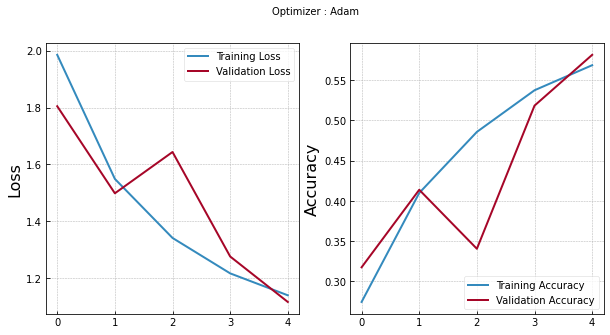

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (10, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
                     
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Dari hasil plotting model diatas ternyata model ini cukup baik atau **Optimal** dalam training data nya, karena grafik **Loss** *talidasi* tidak lebih tinggi dari *training* dan **Accuracy** *validasi* tidak lebih rendah dari *training*